In [1]:
from bs4 import BeautifulSoup as soup
from urllib.request import Request, urlopen
import pandas as pd
import numpy as np
from datetime import date, datetime
import matplotlib.pyplot as plt
import gc #garbage collector
import plotly.graph_objects as go
import plotly.offline as py
py.init_notebook_mode(connected=True)
import seaborn as sns

In [3]:
fname = 'https://www.worldometers.info/coronavirus/#countries'
req = Request(fname, headers={'User-Agent': 'Mozilla/5.0'})
webpage = urlopen(req)
page_soup = soup(webpage, "html.parser")
today = datetime.now()
today_str = "%s %d, %d" % (date.today().strftime("%b"), today.day, today.year)
yesterday_str = "%s %d, %d" % (date.today().strftime("%b"), today.day-1, today.year)
clean = True

In [4]:
print("This version of the notebook is being run on %s." % today_str)


This version of the notebook is being run on Mar 18, 2021.


In [5]:
table = page_soup.findAll("table", {"id": "main_table_countries_yesterday"})
containers = table[0].findAll("tr", {"style": ""})
del containers[0]

all_data = []
for country in containers:
    country_data = []
    country_container = country.findAll("td")
    if country_container[1].text == 'China':
        continue
    for i in range(1, len(country_container)):
        final_feature = country_container[i].text
        if clean:
            if i != 1 and i != len(country_container)-1:
                final_feature = final_feature.replace(',', '')
                if final_feature.find('+') != -1:
                    final_feature = final_feature.replace('+', '')
                    final_feature = float(final_feature)
                elif final_feature.find('-') != -1:
                    final_feature = final_feature.replace('-', '')
                    final_feature = float(final_feature)*-1
        if final_feature == 'N/A':
            final_feature = 0
        elif final_feature == '' or final_feature == ' ':
            final_feature = -1 #None
        country_data.append(final_feature)
    all_data.append(country_data)

In [6]:
df = pd.DataFrame(all_data)

df = df.drop([8, 9, 10, 11, 12, 15, 16, 17], axis=1) # Get rid of unnecessary data

In [7]:
df
column_labels = ["Country", "Total Cases", "New Cases", "Total Deaths", "New Deaths", "Total Recovered", "New Recovered", "Active Cases",
                "Population", "Continent"]
df.columns = column_labels


In [8]:
country_labels = page_soup.findAll("a", {"class": "mt_a"})
c_label = []
for country in country_labels:
    c_label.append(country.text)
c_label = set(c_label)

not_counted = []
sorted_countries = set(df['Country']) #Increase computational speed
for country in c_label:
    if country not in sorted_countries:
        not_counted.append(country)

In [9]:
for label in df.columns:
    if label != 'Country' and label != 'Continent':
        df[label] = pd.to_numeric(df[label])

In [10]:
pd.options.display.max_rows = None
df

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Population,Continent
0,World,121803968,528845.0,2691812,9712.0,98198310,397934.0,20913846.0,-1,All
1,USA,30294798,62794.0,550649,1288.0,22447275,88740.0,7296874.0,332378543,North America
2,Brazil,11700431,90830.0,285136,2736.0,10287057,82516.0,1128238.0,213629898,South America
3,India,11474302,35838.0,159250,171.0,11061170,17793.0,253882.0,1389604984,Asia
4,Russia,4418436,8998.0,93364,427.0,4024975,10755.0,300097.0,145978921,Europe
5,UK,4274579,5758.0,125831,141.0,3568271,19540.0,580477.0,68138862,Europe
6,France,4146609,38501.0,91437,267.0,275360,-1.0,3779812.0,65376055,Europe
7,Italy,3281810,23059.0,103432,431.0,2639370,19716.0,539008.0,60398612,Europe
8,Spain,3206116,6092.0,72793,228.0,2857714,-1.0,275609.0,46767645,Europe
9,Turkey,2930554,18912.0,29696,73.0,2752023,17161.0,148835.0,84980970,Asia


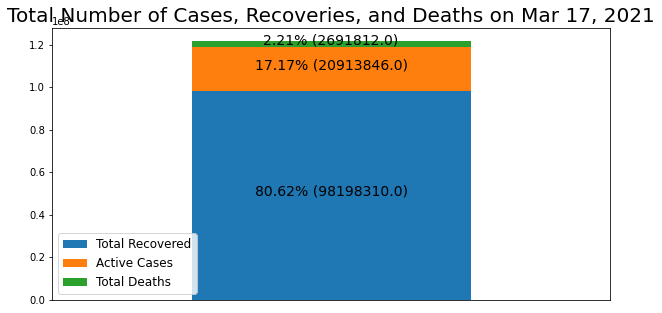

In [11]:
cases_df = df[["Total Recovered", "Active Cases", "Total Deaths"]].loc[0]
pd.DataFrame(cases_df).T.plot.bar(stacked=True, figsize=(10, 5))
plt.xticks(np.arange(0, 0, 1)) # No Ticks
plt.title(f"Total Number of Cases, Recoveries, and Deaths on {yesterday_str}", fontsize=20)
plt.legend(prop={"size": 12})

prev = 0
total = cases_df.sum()
for num in cases_df.cumsum():
    val = round((num-prev)/total*100, 3)
    plt.annotate(f"{val}% ({num-prev})", (0, (num-prev)/2+prev), fontsize=14, ha='center')
    prev = num
plt.show()

In [12]:
continent_df = df.groupby('Continent').sum().drop('All')
continent_df = continent_df.reset_index()
continent_df

,Continent,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Population
0,Africa,4095103,11177.0,108885,255.0,3664665,8315.0,321553.0,1363135809
1,Asia,26374984,113986.0,407945,875.0,24633052,84733.0,1333984.0,3184454898
2,Australia/Oceania,52951,46.0,1099,-10.0,34376,-7.0,17471.0,42469501
3,Europe,36779236,206481.0,866466,3548.0,25983495,96833.0,8053110.0,747951340
4,North America,34813328,72237.0,795903,1554.0,26207072,99731.0,7810350.0,592307767
5,South America,19584137,124873.0,506760,3401.0,17553759,108259.0,1523618.0,433271073


In [13]:
cases_vis_list = ['Total Cases', 'Active Cases', 'New Cases']
deaths_vis_list = ['Total Deaths', 'New Deaths', 'Deaths/1M']
recovered_vis_list = ['Total Recovered', 'New Recovered']
tests_vis_list = ['Total Tests', 'Tests/1M']
essentials = [['Total Cases', 'Active Cases', 'New Cases'], ['Total Deaths', 'New Deaths'], ['Total Recovered', 'New Recovered']]

In [14]:
def continent_visualization(vis_list):
    for label in vis_list:
        pd.DataFrame(continent_df[label]).T.plot.bar(stacked=True, figsize=(10, 5))
        plt.title(f"{label} at the end of {yesterday_str}", fontsize=24)
        plt.xlabel("")
        plt.ylabel(f"{label}", fontsize=16)
        plt.yticks(fontsize=16)
        plt.legend(continent_df['Continent'])

        prev = 0
        total = continent_df[label].sum()
        for num in continent_df[label].cumsum():
            val = round((num-prev)/total*100, 3)
            if val < 1:
                continue
            plt.annotate(f"{val}% ({round(num-prev)})", (0, (num-prev)/2+prev), fontsize=14, ha='center')
            prev = num

        plt.show()
        gc.collect()

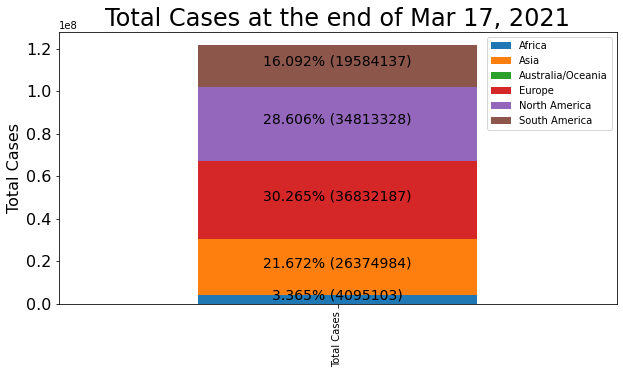

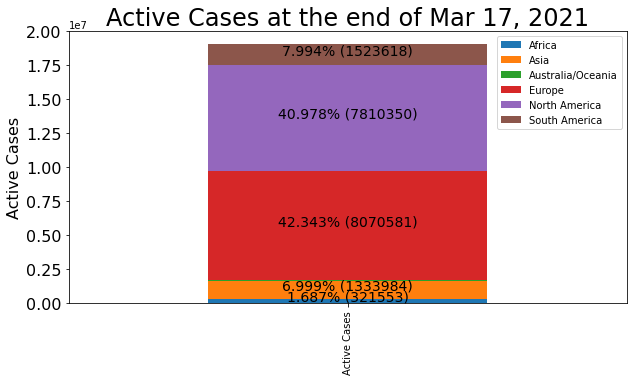

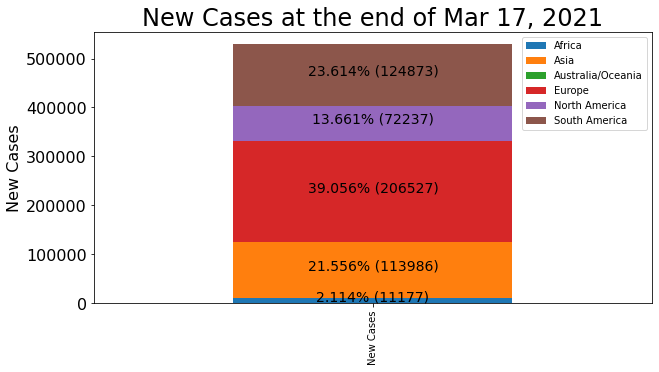

In [15]:
continent_visualization(cases_vis_list)

In [16]:
df = df.drop([len(df)-1])
country_df = df.drop([0])

In [17]:
country_l = country_df.columns[1:14]

fig = go.Figure()
c = 0
for i in country_df.index:
    if c<4:
        fig.add_trace(go.Bar(name=country_df['Country'][i], x=country_l, y=country_df.loc[i][1:14]))
    else:
        break
    c += 1
    
fig.update_layout(title={'text': '4 Countries with Most COVID Cases on %s' % yesterday_str, 'x': 0.5,
                         'xanchor': 'center', 'font': {'size': 20}}, yaxis_title="Percentage", yaxis_type="log", xaxis_tickangle=-90)
fig.show()

In [18]:
bar_list = []
for i in country_df.index:
    bar_list.append(go.Bar(name=country_df['Country'][i], y=[country_df['Total Cases'][i]]))
    
fig = go.Figure(data=bar_list)
fig.update_layout(title={'text': 'Stacked Bar Chart of All Countries COVID-19 Cases on %s' % yesterday_str, 'x': 0.5,
                         'xanchor': 'center', 'font': {'size': 20}}, barmode='stack', height=1200)
fig.show()